In [7]:
import pandas
import scipy.signal
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
rifeco = pandas.read_csv('rifeco.csv')
rifeco.head()

,gameId,region,summonerName,tier,rank,wins,losses,win,lane,role,...,team-firstInhibitor,team-firstBaron,team-firstDragon,team-firstRiftHerald,team-towerKills,team-inhibitorKills,team-baronKills,team-dragonKills,team-vilemawKills,team-riftHeraldKills
0,1048381008,la2,Dryxon,IRON,I,11,11,True,NONE,DUO,...,True,False,False,True,8,1,0,0,0,1.0
1,996031625,la2,LakalakA,IRON,I,4,7,True,MIDDLE,DUO,...,False,False,False,False,4,2,0,0,0,0.0
2,1046312916,la2,Don Napio,IRON,I,72,78,False,BOTTOM,DUO_SUPPORT,...,False,False,False,False,2,0,0,2,0,0.0
3,1001182047,la2,El jugador fénix,IRON,I,8,11,True,MIDDLE,SOLO,...,True,True,True,False,11,4,1,4,0,0.0
4,1039370436,la2,DonSope,IRON,I,13,15,False,NONE,DUO_SUPPORT,...,False,False,False,True,3,0,0,0,0,1.0


In [5]:
rifeco.describe()

,gameId,wins,losses,championId,spell1Id,spell2Id,kills,deaths,assists,largestKillingSpree,...,totalMinionsKilled,goldEarned,goldSpent,visionScore,team-towerKills,team-inhibitorKills,team-baronKills,team-dragonKills,team-vilemawKills,team-riftHeraldKills
count,5.886000e+03,5886.000000,5886.000000,5886.000000,5886.000000,5886.000000,5886.000000,5886.000000,5886.000000,5886.000000,...,5886.000000,5886.000000,5886.000000,5886.000000,5886.000000,5886.000000,5886.000000,5886.000000,5886.0,5885.000000
mean,2.315198e+09,77.647638,77.091403,152.819402,8.619776,8.098709,6.269793,6.507475,9.002209,2.627421,...,91.384642,10729.210669,9804.646619,17.934760,4.325348,0.795277,0.295957,1.424397,0.0,0.558539
std,1.915290e+09,94.109442,90.328910,183.134670,6.242032,5.950913,5.509297,3.661440,7.683468,2.777747,...,70.593389,4232.726601,4288.849592,17.688665,3.482154,1.114842,0.561652,1.434960,0.0,0.695362
min,2.709789e+08,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,670.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.040645e+09,14.000000,17.000000,43.000000,4.000000,4.000000,2.000000,4.000000,3.000000,0.000000,...,30.000000,7710.000000,6900.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.094934e+09,43.000000,45.000000,89.000000,7.000000,4.000000,5.000000,6.000000,7.000000,2.000000,...,72.000000,10547.500000,9650.000000,14.000000,4.000000,0.000000,0.000000,1.000000,0.0,0.000000
75%,3.953002e+09,105.000000,101.000000,164.000000,12.000000,12.000000,9.000000,9.000000,12.000000,4.000000,...,149.000000,13402.750000,12400.000000,25.000000,7.000000,1.000000,0.000000,2.000000,0.0,1.000000
max,1.104838e+10,879.000000,886.000000,887.000000,32.000000,32.000000,44.000000,23.000000,57.000000,42.000000,...,336.000000,31568.000000,52585.000000,115.000000,11.000000,8.000000,4.000000,6.000000,0.0,2.000000


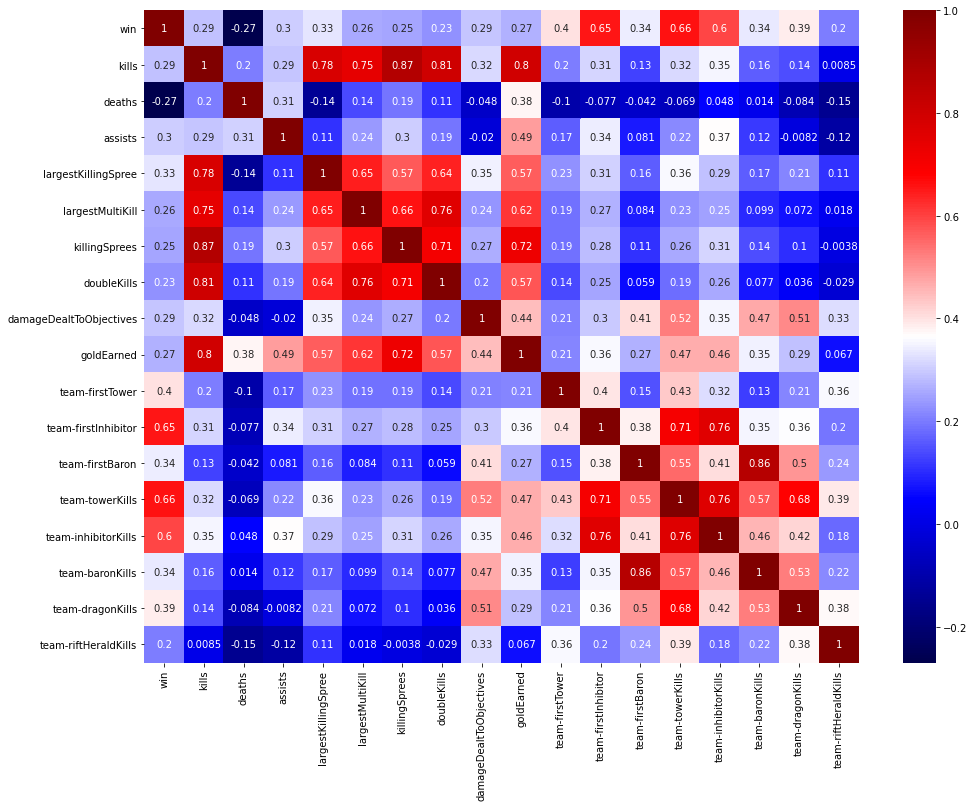

In [31]:
corrmat = rifeco.corr()
top_corr_features = corrmat.index[abs(corrmat["win"]) > 0.2]

plt.figure(figsize = (16,12))
ax = sns.heatmap(rifeco[top_corr_features].corr(),annot=True,cmap="seismic")
plt.show()